Problem statement:Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

     1.To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
     2.To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
     3.To know the accuracy of the model, i.e. how well these variables can predict house prices.
     
(Note:use regularization concept to avoid over-fitting)

In [27]:
import pandas as pd
df = pd.read_csv('Naresh Jangir (NjA) - Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
df[df.isnull().any(axis=1)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [33]:
df_pre=pd.get_dummies(df,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first=True,dtype=int)

In [34]:
df_pre.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [35]:
corMat = df_pre.corr()

In [36]:
corMat

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


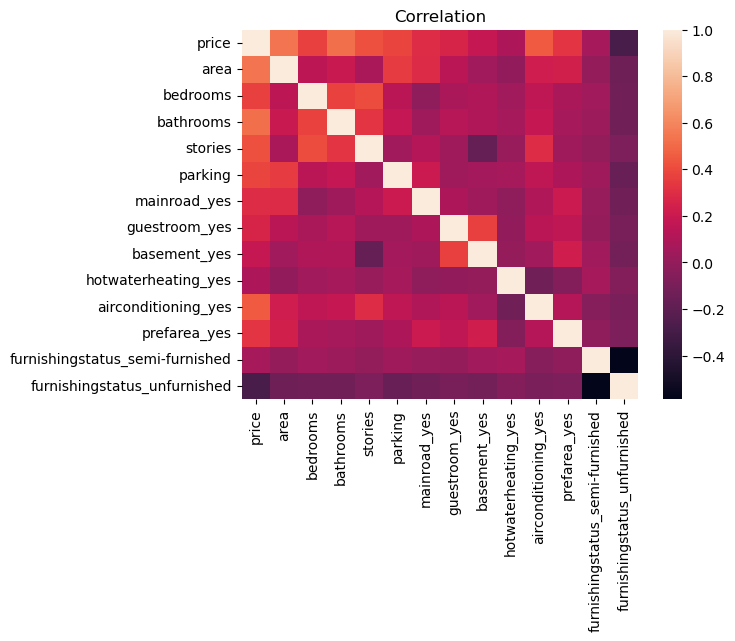

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(corMat)
plt.title('Correlation')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df_pre
df_scaled[['area','bedrooms','bathrooms','stories','parking']] = pd.DataFrame(scaler.fit_transform(df_pre[['area','bedrooms','bathrooms','stories','parking']]),columns=['area','bedrooms','bathrooms','stories','parking'])
df_scaled.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667,1,0,0,0,1,1,0,0
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000,1,0,0,0,1,0,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667,1,0,1,0,0,1,1,0
3,12215000,0.402062,0.6,0.333333,0.333333,1.000000,1,0,1,0,1,1,0,0
4,11410000,0.396564,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

X = df_scaled
y = df_scaled[['price']]
X = X.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)


In [71]:
y_test.columns

Index(['price'], dtype='object')

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [73]:
model.coef_

array([[3412823.43260823,  382178.7514806 , 3080356.07269709,
        1245761.29879096,  810696.91371966,  367977.10254624,
         384128.68952286,  325778.5200032 ,  921280.34946997,
         881777.11248409,  536230.54125938,   72457.31834219,
        -369336.40333479]])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6490278276183423


Starting with Ridge and Lasso

In [87]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

rparams = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, rparams,scoring='neg_mean_squared_error',cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred = ridge_grid.predict(X_test)

lparams = {'alpha': [0.01, 0.1, 1, 10]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lparams, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred = lasso_grid.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Ridge: {ridge_mse, ridge_r2}\nLasso: {lasso_mse, lasso_r2}")

Ridge: (1510193562454.5315, 0.6488745244899132)
Lasso: (1509565280888.4697, 0.6490206022306229)


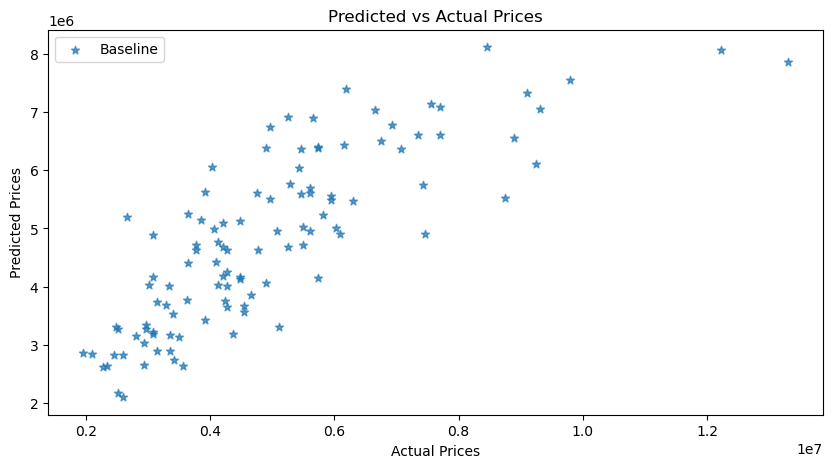

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, label="Baseline", alpha=0.7,marker='*'cmap=)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Predicted vs Actual Prices")
plt.show()